In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [26]:
# Handle missing values (if 'Cabin' exists)
if 'Cabin' in train_data.columns:
    train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
    train_data['Cabin'].fillna(train_data['Cabin'].mode().iloc[0], inplace=True)
    train_data['Embarked'].fillna(train_data['Embarked'].mode().iloc[0], inplace=True)
train_data=train_data.drop(columns='Name')
test_data=test_data.drop(columns='Name')
train_data=train_data.drop(columns='Cabin')
test_data=test_data.drop(columns='Cabin')
train_data=train_data.drop(columns='Ticket')
test_data=test_data.drop(columns='Ticket')



In [27]:
# Define categorical and numerical columns
categorical_columns = ['Pclass','Sex', 'Embarked']
numerical_columns = ['Age', 'Fare']

In [28]:
# Encode categorical variables
le = LabelEncoder()

for col in categorical_columns:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])


In [29]:
# Standardize numerical variables
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])


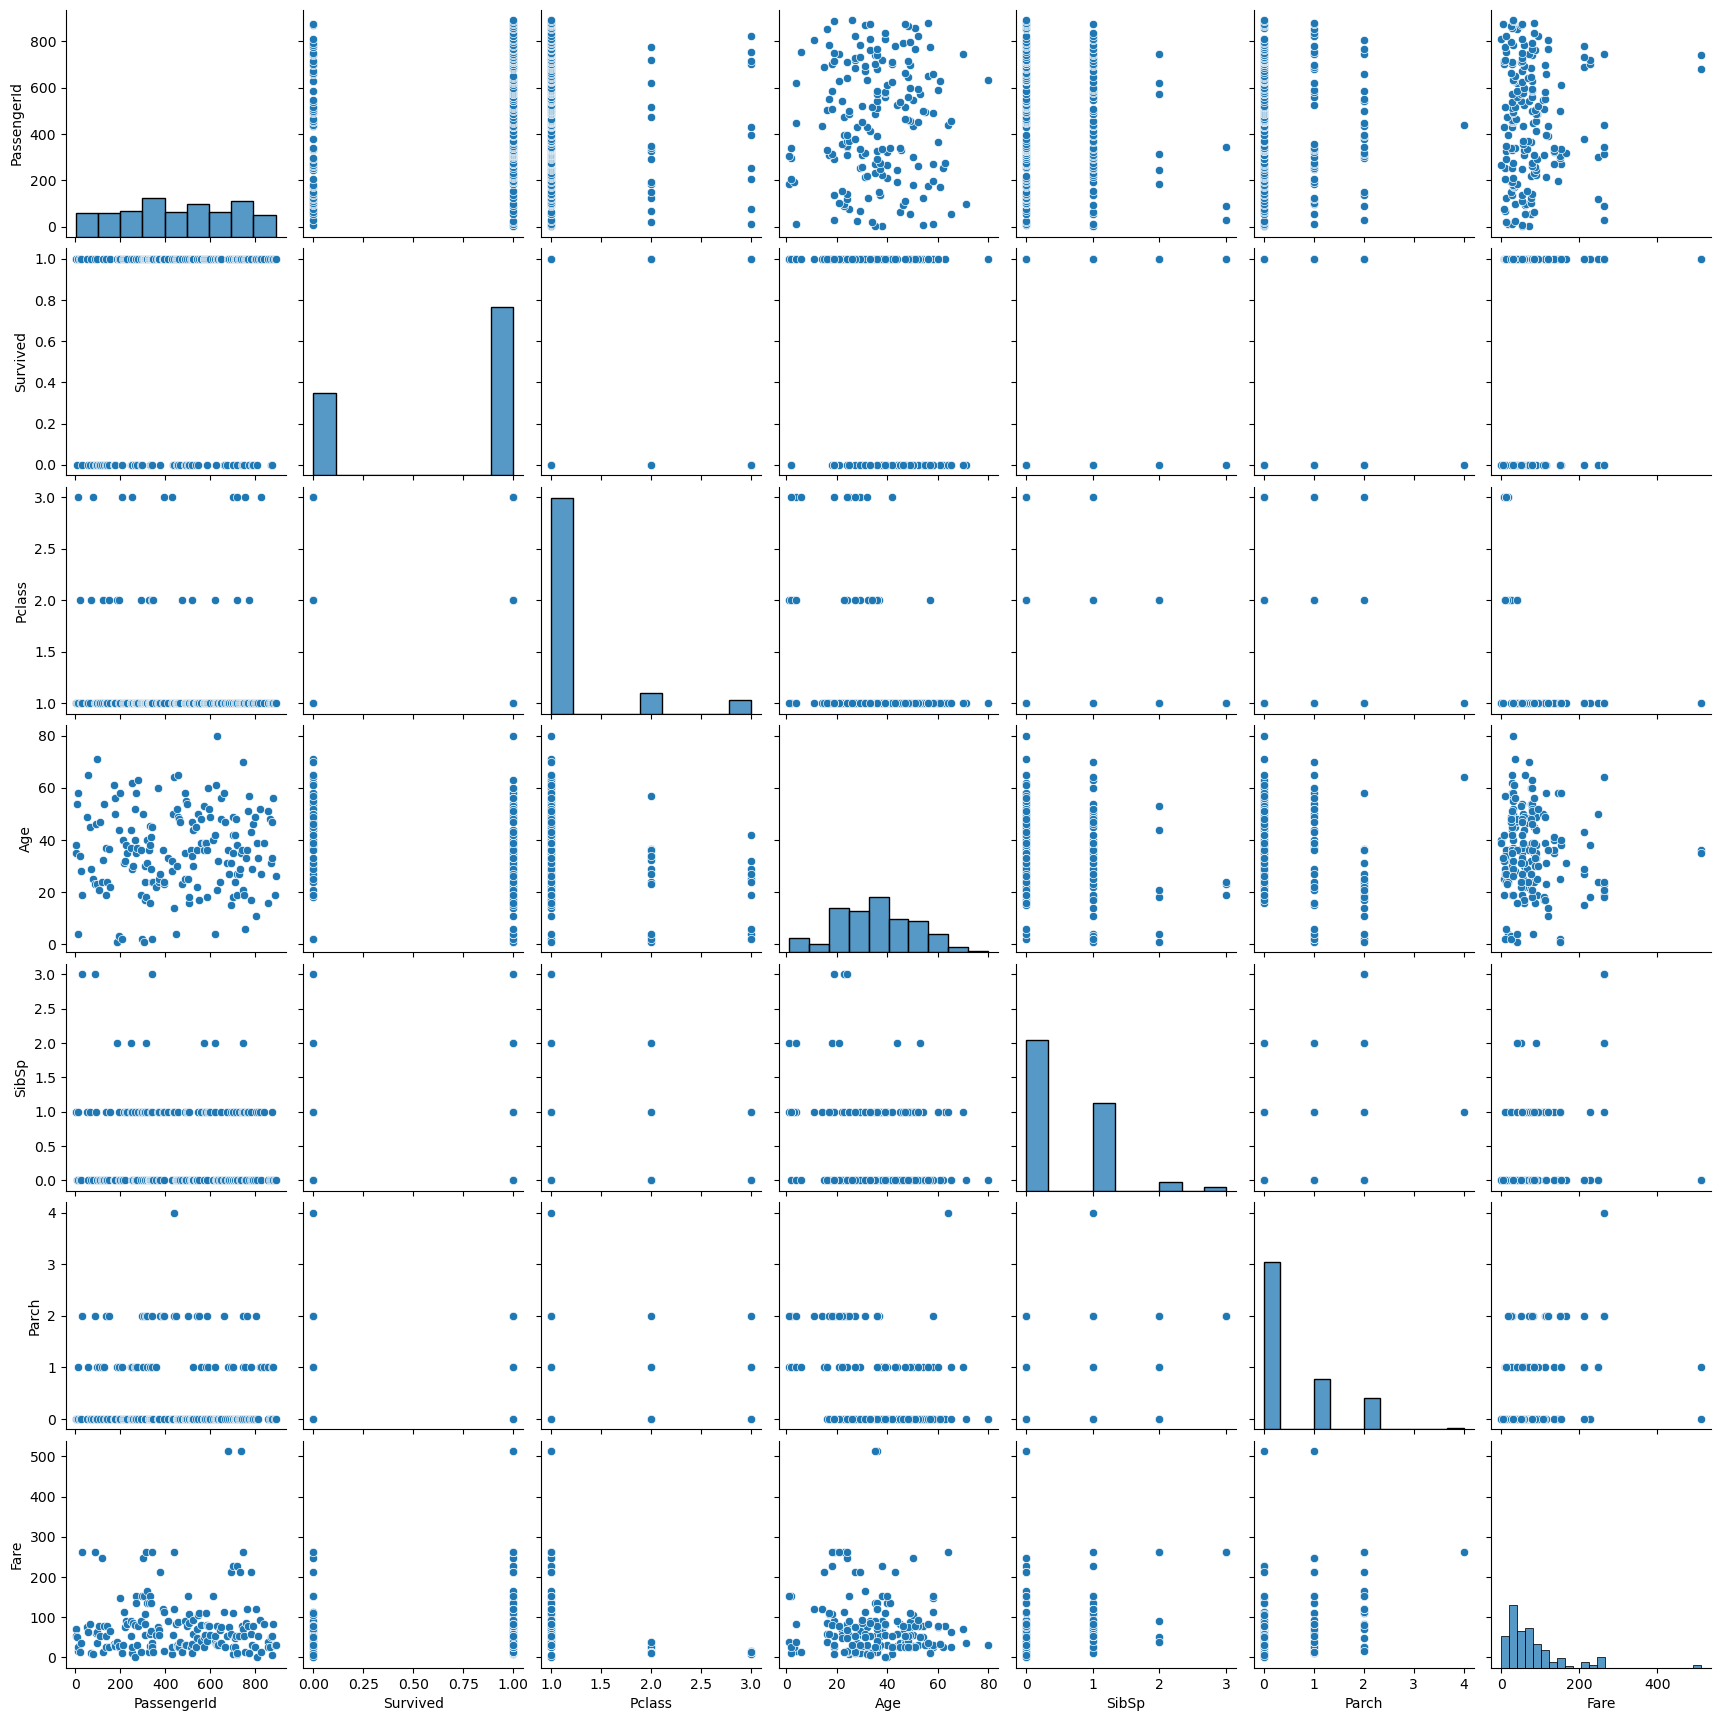

In [15]:
# Separate features and target variable
X = train_data.drop('Embarked', axis=1)
y =train_data['Embarked']
import numpy as np
train_data =train_data.replace([np.inf, -np.inf], np.nan)
# Visualizations 
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na option is deprecated")
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(train_data)
plt.show()

In [30]:
model = LogisticRegression(max_iter=1000)  # Increase max_iter from default (100)
model.fit(train_data.drop('Survived', axis=1), train_data['Survived'])

LogisticRegression(max_iter=1000)

In [31]:
# Use HistGradientBoostingClassifier instead
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(train_data.drop('Survived', axis=1), train_data['Survived'])


HistGradientBoostingClassifier()

In [39]:
# Make predictions on the test data
y_pred = model.predict(test_data)

# Save the predictions to a new file (optional)
predictions_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred})
predictions_df.to_csv('predictions.csv', index=False)